In [1]:
import pyccl as ccl
print(f"I am using pyccl version {ccl.__version__}")
import numpy as np
from scripts.data_vectors import DataVectors
from scripts.presets import Presets
import scripts.plotting as p
from scripts.kernel_metrics import KernelMetrics
import matplotlib.pyplot as plt
ccl_version = ccl.__version__

I am using pyccl version 2.8.0


In [2]:
# Here we define the redshift distribution parameters.
# Our distribution will go from 0 to redshift_max with redshift_resolution points.
# We do not need to specify two sets of maximal redshifts or resolutions 
# because the scans will be done by calling the methods from the DataVectorMetrics class.
redshift_max = 3.5
redshift_resolution = 500
forecast_year = "10"
# Please note that the redshift resolution is the number of redshifts between 0 and redshift_max.
# Additionally, a lot of parametric sweeping is already coded into helper functions 
# so we will not need to worry about that for now.

# We will also investigate ell binning but for this particular exercise,
# we will keep the ell binning at default values.
#ell_min = 20
#ell_max = 2000
#n_ell = 50

# We now initialize the class by only passing the redshift information.
presets = Presets(redshift_max=redshift_max,
                  redshift_resolution=redshift_resolution,
                  forecast_year=forecast_year)

# We can now access the redshifts and ells directly from presets.
redshift_range = presets.redshift_range
ells = presets.ells

# Here we initialize the data vectors class with the presets.
dv = DataVectors(presets)
# and then we get the kernels.
wl_kernel = dv.get_wl_kernel()
nc_kernel = dv.get_nc_kernel()
km = KernelMetrics(presets)
wl_kernel_peaks = km.get_kernel_peaks(wl_kernel, redshift_range)
nc_kernel_peaks = km.get_kernel_peaks(nc_kernel, redshift_range)

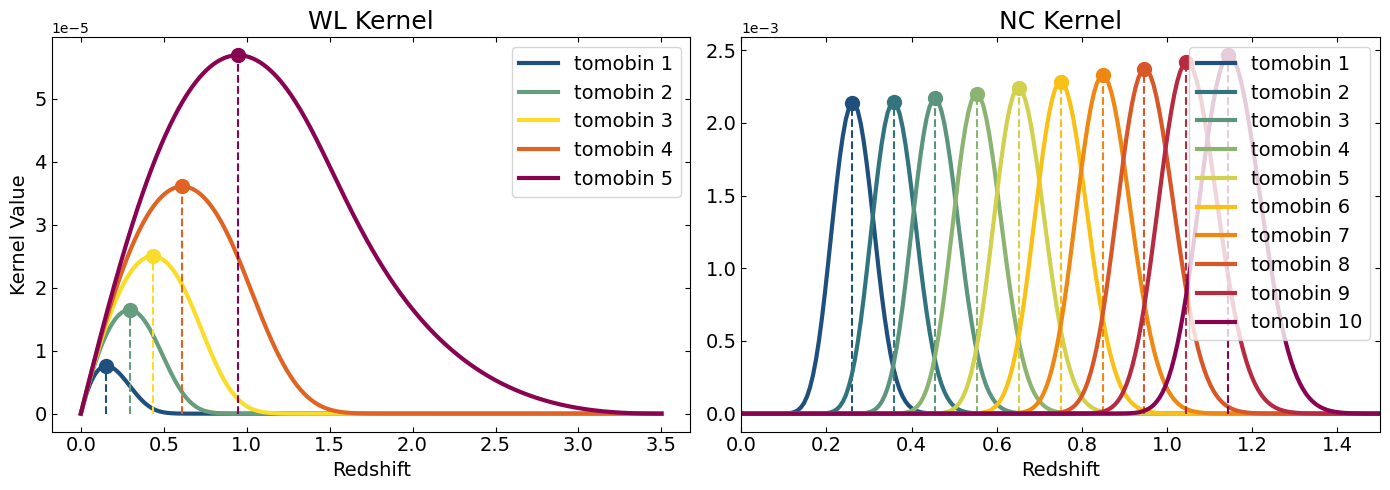

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

wl_colors = p.get_colors(wl_kernel)
nc_colors = p.get_colors(nc_kernel)
lw = 3

# Flatten wl_kernel[i] and nc_kernel[i] to ensure they are 1D arrays
for i in range(len(wl_kernel)):
    wl_redshift, wl_peak_value = wl_kernel_peaks[i]
    axes[0].plot(redshift_range, wl_kernel[i].ravel(), lw=lw, c=wl_colors[i], label=f"tomobin {i+1}")
    axes[0].vlines(x=wl_redshift, ymin=0, ymax=np.max(wl_kernel[i]), color=wl_colors[i], linestyle='--')
    axes[0].scatter(wl_redshift, wl_peak_value, color=wl_colors[i], s=100)
    axes[0].legend(loc='upper right', fontsize=14)
    axes[0].set_title("WL Kernel", fontsize=18)
    axes[0].set_xlabel("Redshift", fontsize=14)
    axes[0].set_ylabel("Kernel Value", fontsize=14)
    axes[0].tick_params(axis='both', which='major', labelsize=14, direction='in', top=True, right=True)
    axes[0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

for i in range(len(nc_kernel)):
    nc_redshift, nc_peak_value = nc_kernel_peaks[i]
    axes[1].plot(redshift_range, nc_kernel[i].ravel(), lw=lw, c=nc_colors[i], label=f"tomobin {i+1}")
    axes[1].vlines(x=nc_redshift, ymin=0, ymax=np.max(nc_kernel[i]), color=nc_colors[i], linestyle='--')
    axes[1].scatter(nc_redshift, nc_peak_value, color=nc_colors[i], s=100)
    axes[1].legend(loc='upper right', fontsize=14)
    axes[1].set_title("NC Kernel", fontsize=18)
    axes[1].set_xlabel("Redshift", fontsize=14)
    axes[1].set_xlim(0, 1.5)
    axes[1].tick_params(axis='both', which='major', labelsize=14, direction='in', top=True, right=True)
    axes[1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

plt.tight_layout()
plt.show()


In [4]:
%%time
# Here we will sweep over the redshift_max parameter.
# This will take a while to run (cca a minute).
# In order to avoid running this cell, we will comment it out
# and we will load the results from the file for the appropriate forecast year.
data_path = "data_output/kernels/"
zres_fname = f"kernel_peaks_zres_sweep_y{forecast_year}_ccl_v{ccl_version}.npy"
kernel_peaks_zres_sweep  = np.load(f"{data_path}{zres_fname}",
                            allow_pickle=True).item()

# In case you want to run the code (and you should) just to test it, uncomment the following line.
#kernel_peaks_zres_sweep = km.kernel_peaks_zres_sweep()

CPU times: user 4.15 ms, sys: 2.5 ms, total: 6.65 ms
Wall time: 5.59 ms


In [5]:
%%time
# Here we will sweep over the redshift_max parameter.
# This will take a while to run (cca 5 to 6 minutes).
# Just as above, in order to avoid running this cell, we will comment it out
# and we will load the results from the file for the appropriate forecast year.
data_path = "data_output/kernels/"
zres_zmax_fname = f"kernel_peaks_zres_and_zmax_sweep_y{forecast_year}_ccl_v{ccl_version}.npy"
kernel_peaks_zres_and_zmax_sweep = np.load(f"{data_path}{zres_zmax_fname}",
                                     allow_pickle=True).item()

# In case you want to run the code (and you should) just to test it, uncomment the following lines.
#kernel_peaks_zres_and_zmax_sweep = km.kernel_peaks_zres_and_zmax_sweep()

CPU times: user 26 ms, sys: 7.79 ms, total: 33.8 ms
Wall time: 33.7 ms


# Plotting the results of the sweeps
We can now plot the results of the sweeps.

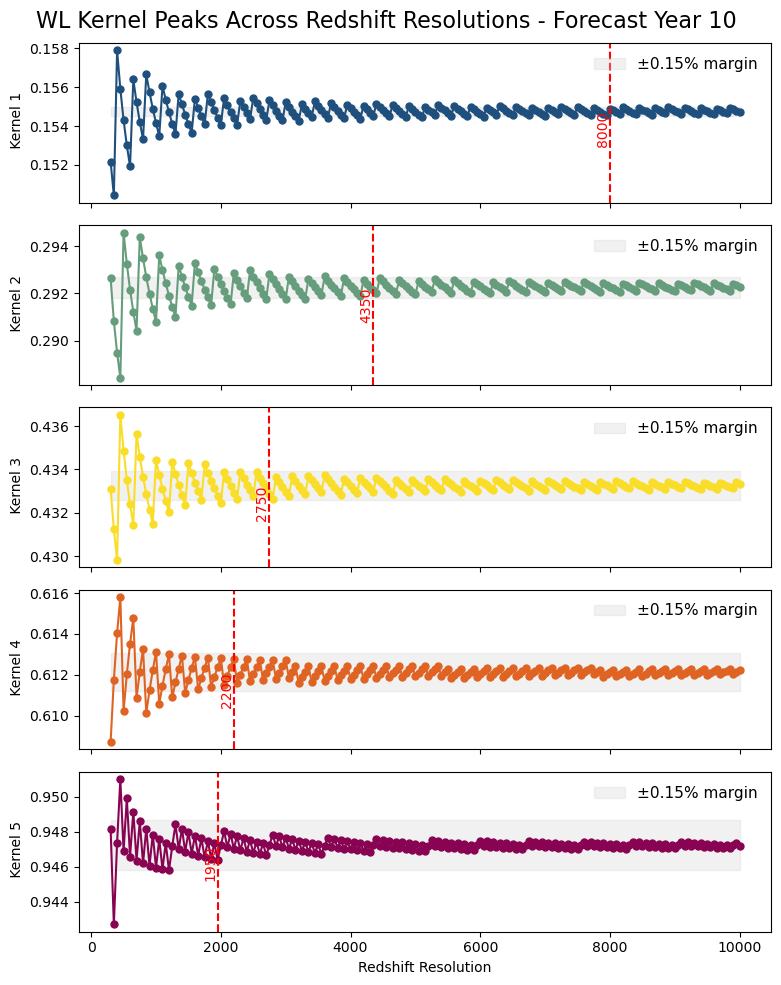

In [6]:
p.plot_kernel_peaks_zres_sweep(kernel_peaks_zres_sweep,
                                 forecast_year=forecast_year,
                                 kernel_type="wl",
                                 precision=0.15,
                                 stability_steps=15)


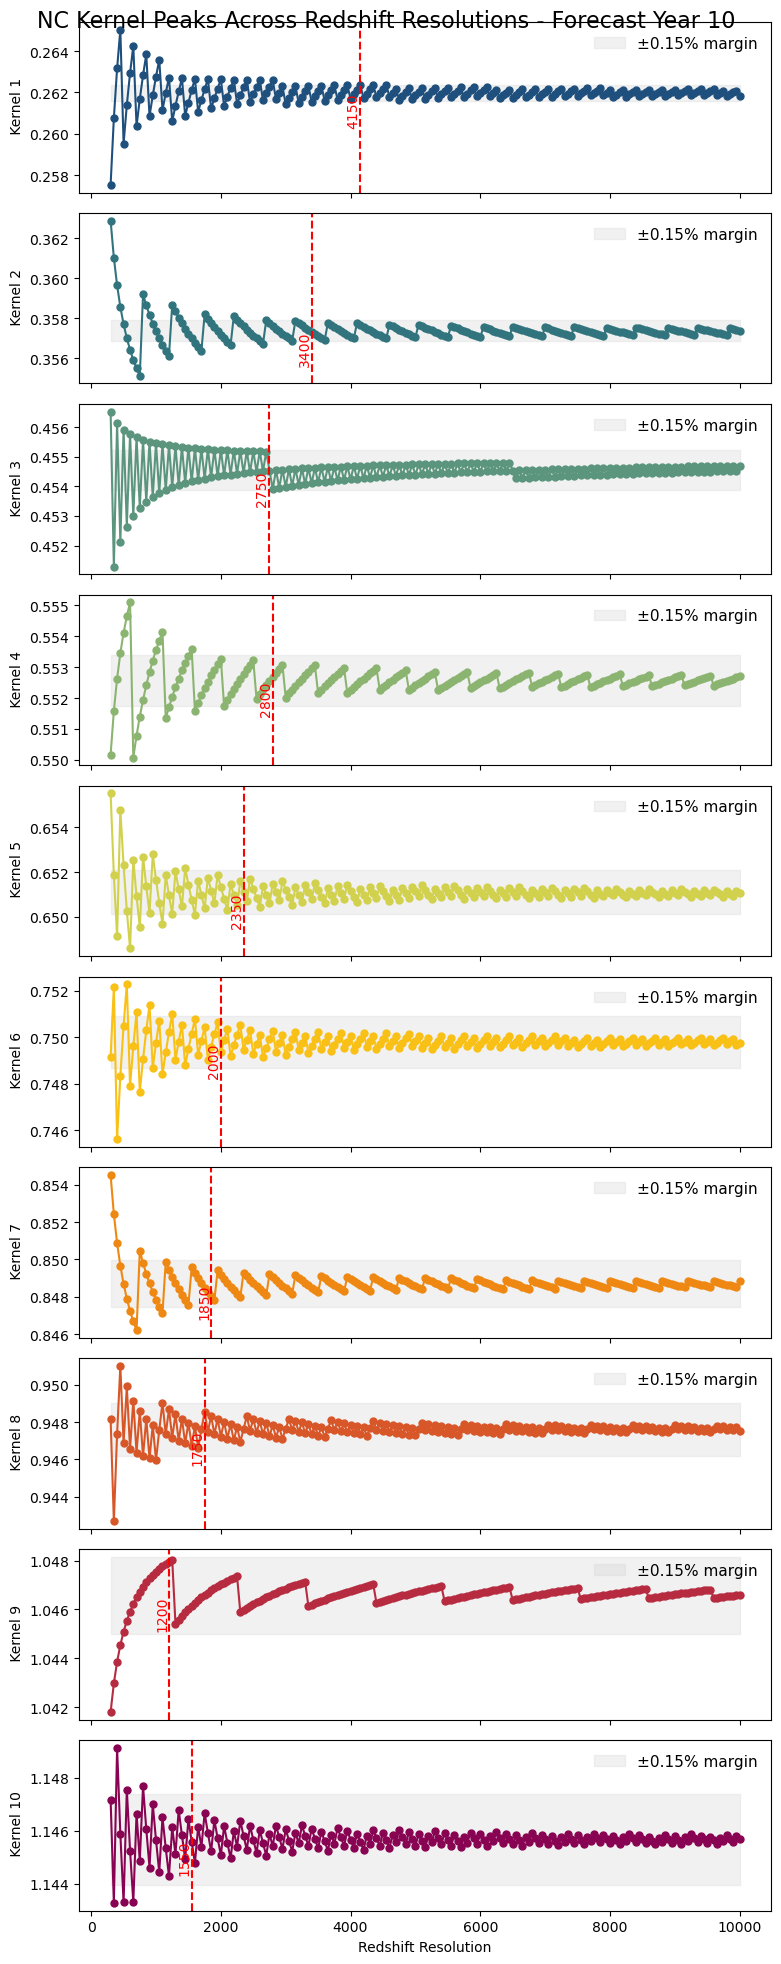

In [7]:
p.plot_kernel_peaks_zres_sweep(kernel_peaks_zres_sweep,
                               forecast_year=forecast_year,
                               kernel_type="nc",
                               precision=0.15,
                               stability_steps=15)


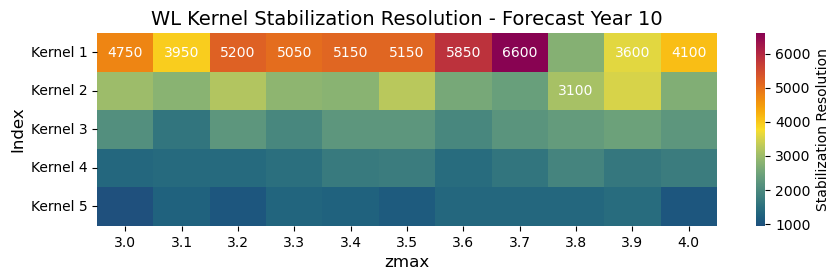

In [8]:
p.plot_kernel_peaks_zres_zmax_sweep(kernel_peaks_zres_and_zmax_sweep,
                                               forecast_year=forecast_year,
                                               kernel_type="wl",
                                               precision=0.2,
                                               stability_steps=10,
                                               annotate_max=True)

In [ ]:
p.plot_kernel_peaks_zres_zmax_sweep(kernel_peaks_zres_and_zmax_sweep,
                                               forecast_year=forecast_year,
                                               kernel_type="nc",
                                               precision=0.2,
                                               stability_steps=10,
                                               annotate_max=True)